In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

fighter_data = pd.read_csv("fighters.csv")

print(fighter_data.head())

                             name  wins  looses  draws ko_rate    stance  \
0  Azizbek Abdumuxtar Abdugofurov     0       0      0      0%  Orthodox   
1     Franco Fernando Altamiranda     0       0      0      0%  Orthodox   
2            Joaquin Saul Alvarez     0       0      0      0%  Orthodox   
3                    Saul Alvarez    54       1      2   63.2%  Orthodox   
4                     Sukru Altay     0       0      0      0%  Orthodox   

       age            height                  reach  \
0  Unknown           Unknown                Unknown   
1  Unknown           Unknown                Unknown   
2  Unknown           Unknown                Unknown   
3       32  5.74 ft (1.75 m)  70.47 inches (179 cm)   
4       38           Unknown                Unknown   

                             country  
0                         Uzbekistan  
1                          Argentina  
2  Venezuela, Bolivarian Republic of  
3                             Mexico  
4                

In [24]:
fighter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2760 non-null   object
 1   wins     2760 non-null   int64 
 2   looses   2760 non-null   int64 
 3   draws    2760 non-null   int64 
 4   ko_rate  2760 non-null   object
 5   stance   2760 non-null   object
 6   age      2760 non-null   object
 7   height   2760 non-null   object
 8   reach    2760 non-null   object
 9   country  2760 non-null   object
dtypes: int64(3), object(7)
memory usage: 215.8+ KB


In [25]:
# prepare the data for EDA & Visualization
fighter_data[fighter_data.columns.drop('stance')] = fighter_data[fighter_data.columns.drop('stance')].replace('Unknown', '0.0')
fighter_data['ko_rate'] = fighter_data['ko_rate'].apply(lambda value: str(value).replace('%', ' '))
fighter_data[['wins', 'looses', 'draws', 'ko_rate', 'age']] = fighter_data[['wins', 'looses', 'draws', 'ko_rate', 'age']].astype(float)

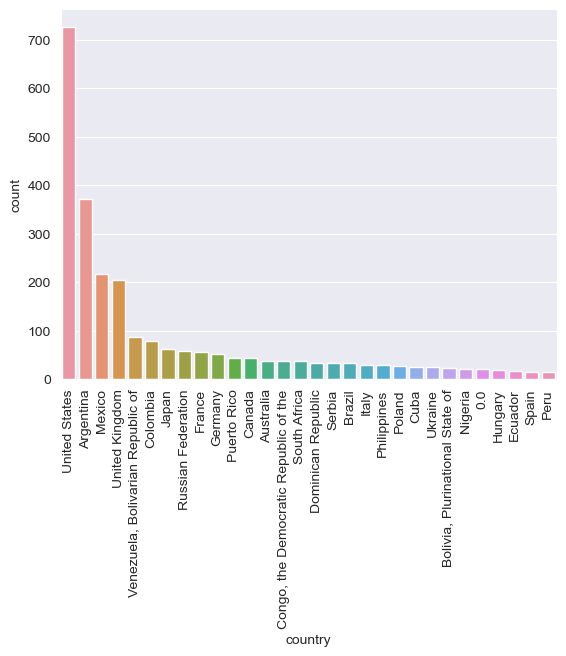

In [26]:
# count the boxers of a country
sns.countplot(x = fighter_data['country'], order = fighter_data['country'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

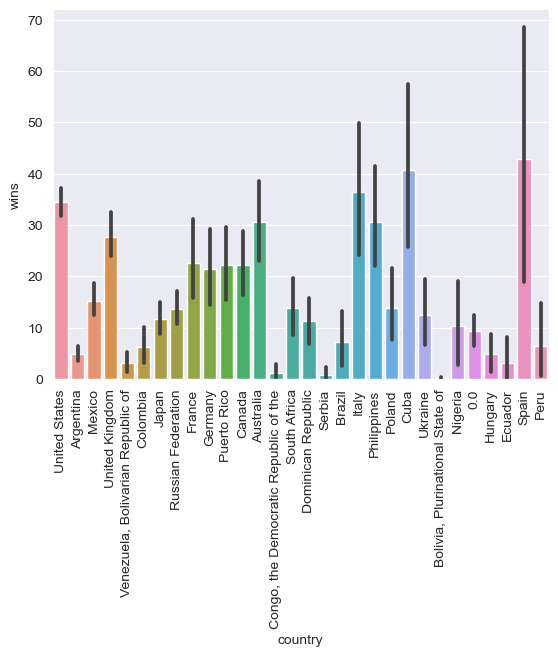

In [27]:
# the mean of list_ per country 
sns.barplot(x = fighter_data['country'], y = fighter_data['wins'], order = fighter_data['country'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

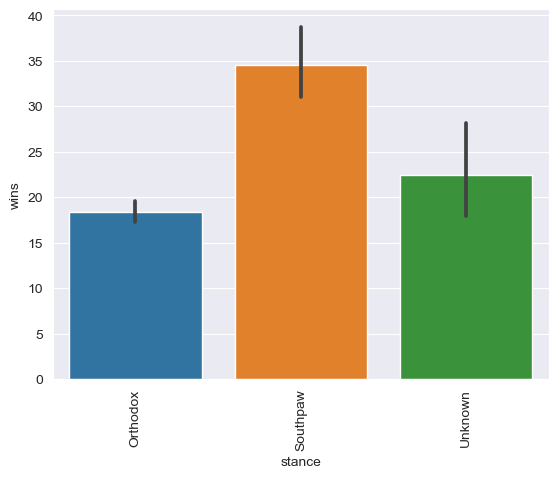

In [28]:
# the mean of list_ per prefer stance
sns.barplot(x = fighter_data['stance'], y = fighter_data['wins'])
plt.xticks(rotation = 90)
plt.show()

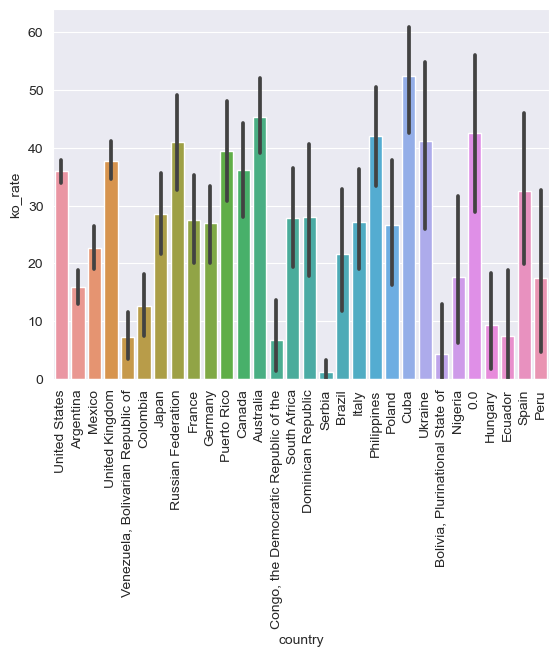

In [29]:
# the mean of list_ per country 
sns.barplot(x = fighter_data['country'], y = fighter_data['ko_rate'], order = fighter_data['country'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

In [30]:
# normalize the name 
def normalize_the_name(name):
    name = name.upper()
    name = str(name).replace(' ', '')
    return name

fighter_data['name'] = fighter_data['name'].apply(lambda name: normalize_the_name(name))
fighter_data['name']

0       AZIZBEKABDUMUXTARABDUGOFUROV
1          FRANCOFERNANDOALTAMIRANDA
2                 JOAQUINSAULALVAREZ
3                        SAULALVAREZ
4                         SUKRUALTAY
                    ...             
2755                   ZAURABDULLAEV
2756                   ARTHURABRAHAM
2757                   VICTORABRAHAM
2758                        REIYAABE
2759                 ELNURABDURAIMOV
Name: name, Length: 2760, dtype: object

In [31]:
# take just the value(cm) in height and reach column
def take_the_cm(string, a, b):
    if string == '0.0':
        return '0.0'
    else: 
        return string[a:-b]
    
fighter_data['reach'] = fighter_data['reach'].apply(lambda row: take_the_cm(row, 14, 4))
fighter_data['height'] = fighter_data['height'].apply(lambda row: take_the_cm(row, 9, 3))
fighter_data['reach'], fighter_data['height']

(0       0.0
 1       0.0
 2       0.0
 3       179
 4       0.0
        ... 
 2755    0.0
 2756    183
 2757    178
 2758    0.0
 2759    0.0
 Name: reach, Length: 2760, dtype: object,
 0        0.0
 1        0.0
 2        0.0
 3       1.75
 4        0.0
         ... 
 2755    1.75
 2756    1.75
 2757    1.74
 2758     0.0
 2759     0.0
 Name: height, Length: 2760, dtype: object)

In [32]:
# for input at the prediction model
data_fighters = pd.get_dummies(fighter_data, columns = ['stance'])
data_fighters

,name,wins,looses,draws,ko_rate,age,height,reach,country,stance_Orthodox,stance_Southpaw,stance_Unknown
0,AZIZBEKABDUMUXTARABDUGOFUROV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Uzbekistan,True,False,False
1,FRANCOFERNANDOALTAMIRANDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Argentina,True,False,False
2,JOAQUINSAULALVAREZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Venezuela, Bolivarian Republic of",True,False,False
3,SAULALVAREZ,54.0,1.0,2.0,63.2,32.0,1.75,179,Mexico,True,False,False
4,SUKRUALTAY,0.0,0.0,0.0,0.0,38.0,0.0,0.0,Germany,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,ZAURABDULLAEV,8.0,1.0,0.0,50.0,28.0,1.75,0.0,0.0,True,False,False
2756,ARTHURABRAHAM,47.0,6.0,0.0,56.6,42.0,1.75,183,Germany,True,False,False
2757,VICTORABRAHAM,24.0,15.0,0.0,20.5,66.0,1.74,178,United States,True,False,False
2758,REIYAABE,16.0,2.0,1.0,42.1,29.0,0.0,0.0,Japan,False,True,False


In [33]:
popular_matches = pd.read_csv("popular_matches.csv")
print(popular_matches.head)
print(popular_matches.info)

<bound method NDFrame.head of                   date    place             opponent_1             opponent_2  \
0       31 August 2019  Unknown      Vasyl Lomachenko           Luke Campbell   
1    19 September 2019  Unknown  Orlando Fiordigiglio           Sam Eggington   
2       5 October 2019  Unknown      Gennady Golovkin   Sergiy Derevyanchenko   
3      12 October 2019  Unknown     Chazz Witherspoon          Oleksandr Usyk   
4    27 September 2019  Unknown       Ebenezer Tetteh           Daniel Dubois   
..                 ...      ...                    ...                    ...   
147       7 March 2020  Unknown     Theophilus Tetteh          Anthony Fowler   
148   22 February 2020  Unknown        Deontay Wilder              Tyson Fury   
149       7 March 2020  Unknown           Scott Quigg            Jono Carroll   
150     29 August 2020  Unknown            Joe Hughes             Sam Maxwell   
151    17 October 2020  Unknown      Vasyl Lomachenko           Teofimo Lopez  

In [34]:
## prepare the DATA
popular_matches = popular_matches.drop('place', axis = 1)
popular_matches = popular_matches.fillna(0.0)
popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']] = popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']].astype(float)

In [36]:
# create new columns with the last name of the boxers
def take_the_name(name, position):
    latters = str(name.upper()).split()
    if latters[position] == 'JR':
        del latters[-1]
    return latters[position]

popular_matches['op_1'] = popular_matches['opponent_1'].apply(lambda name: take_the_name(name, -1))
popular_matches['op_2'] = popular_matches['opponent_2'].apply(lambda name: take_the_name(name, -1))

popular_matches.insert(1, 'last_name_1', popular_matches['op_1'])
popular_matches.insert(2, 'last_name_2', popular_matches['op_2'])

popular_matches = popular_matches.drop('op_1', axis = 1)
popular_matches = popular_matches.drop('op_2', axis = 1)

In [37]:
# normalize the name of boxers
def normalize_the_name(name):
    name = name.upper()
    name = str(name).replace(' ', '')
    return name

popular_matches['opponent_1'] = popular_matches['opponent_1'].apply(lambda name: normalize_the_name(name))
popular_matches['opponent_2'] = popular_matches['opponent_2'].apply(lambda name: normalize_the_name(name))

In [38]:
# clean the verdict column and create the column with the reason of the winner
def take_the_reason_to_winner(row):
    latters = str(row).split()
    if len(latters) == 7:
        return latters[3]
    if len(latters) > 7:
        return latters[4]
    else:
        return 0.0
    
popular_matches['reason_winner'] = popular_matches['verdict'].apply(lambda row: take_the_reason_to_winner(row))
popular_matches['verdict'] = popular_matches['verdict'].apply(lambda row: take_the_name(row, 0))

In [39]:
# take the names of the boxers in data_popular_matches
def take_the_opponents():
    list_name_1, list_name_2 = [], []
    for i in range(popular_matches.shape[0]):
        name_opponent_1 = popular_matches['opponent_1'][i]
        name_opponent_2 = popular_matches['opponent_2'][i]

        list_name_1.append(name_opponent_1)
        list_name_2.append(name_opponent_2)
    
    return list_name_1, list_name_2

list_name_opponent_1, list_name_opponent_2 = take_the_opponents()


In [40]:
# create the list of the new columns
wins_1, looses_1, draws_1, ko_rate_1, age_1, height_1, reach_1, country_1, stance_Orthodox_1, stance_Southpaw_1, stance_Unknown_1 = [], [], [], [], [], [], [], [], [], [], [] 

list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1',
'height_1', 'reach_1', 'country_1', 'stance_Orthodox_1', 'stance_Southpaw_1',
'stance_Unknown_1']

list_columns_1 = [wins_1, looses_1, draws_1, ko_rate_1, age_1,
height_1, reach_1, country_1, stance_Orthodox_1, stance_Southpaw_1,
stance_Unknown_1]

wins_2, looses_2, draws_2, ko_rate_2, age_2, height_2, reach_2, country_2, stance_Orthodox_2, stance_Southpaw_2, stance_Unknown_2 = [], [], [], [], [], [], [], [], [], [], [] 

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2',
'height_2', 'reach_2', 'country_2', 'stance_Orthodox_2', 'stance_Southpaw_2',
'stance_Unknown_2']

list_columns_2 = [wins_2, looses_2, draws_2, ko_rate_2, age_2,
height_2, reach_2, country_2, stance_Orthodox_2, stance_Southpaw_2,
stance_Unknown_2]

In [41]:
# function that take all parameters/columns per name in data_fighters
''' 
    The condition if/else is there because some boxers ins`t
    at data_fighters. From the future, if necessary, take the parameters 
    with webscrapping. 220 boxers are found.
'''
def take_the_parameters(name):
    row = data_fighters.loc[data_fighters['name'] == str(name)] 
    row = np.array(row[row.columns].values)
    
    if row.shape[0] == 1.0:
        row = np.delete(row, [0])
    else:
        row = np.zeros(11 , dtype = float)

    return row

In [42]:
# create the DATA with all parameters
def full_DATA():
    # count = 0.0
    for name in list_name_opponent_1:
        row = take_the_parameters(name)
        # if row[0] > 0.0:
        #     count += 1.0
        for i in range(len(list_columns_1)):
            list_columns_1[i].append(row[i])

    for name in list_name_opponent_2:
        row = take_the_parameters(name)
        # if row[0] > 0.0:
        #     count += 1.0
        for i in range(len(list_columns_2)):
            list_columns_2[i].append(row[i])
    # print(count)

    for count, values in enumerate(list_columns_1_str): 
        popular_matches[list_columns_1_str[count]] = list_columns_1[count]

    for count, values in enumerate(list_columns_2_str): 
        popular_matches[list_columns_2_str[count]] = list_columns_2[count]

    return popular_matches

full_data = full_DATA()
full_data

,date,last_name_1,last_name_2,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,...,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,country_2,stance_Orthodox_2,stance_Southpaw_2,stance_Unknown_2
0,31 August 2019,LOMACHENKO,CAMPBELL,VASYLLOMACHENKO,LUKECAMPBELL,72.0,72.0,73.9,60.5,78.0,...,3.0,0.0,66.7,34.0,1.75,180,United Kingdom,False,True,False
1,19 September 2019,FIORDIGIGLIO,EGGINGTON,ORLANDOFIORDIGIGLIO,SAMEGGINGTON,59.0,59.0,55.4,54.5,68.0,...,7.0,0.0,48.6,28.0,1.80,0.0,United Kingdom,True,False,False
2,5 October 2019,GOLOVKIN,DEREVYANCHENKO,GENNADYGOLOVKIN,SERGIYDEREVYANCHENKO,82.0,82.0,68.0,63.3,84.0,...,2.0,0.0,66.7,36.0,1.70,171,United States,True,False,False
3,12 October 2019,WITHERSPOON,USYK,CHAZZWITHERSPOON,OLEKSANDRUSYK,69.0,69.0,59.6,68.9,79.0,...,0.0,0.0,72.2,35.0,1.90,0.0,Ukraine,False,True,False
4,27 September 2019,TETTEH,DUBOIS,EBENEZERTETTEH,DANIELDUBOIS,46.0,46.0,0.0,44.4,50.0,...,1.0,0.0,87.5,25.0,1.94,0.0,United Kingdom,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,7 March 2020,TETTEH,FOWLER,THEOPHILUSTETTEH,ANTHONYFOWLER,56.0,56.0,41.7,45.7,67.0,...,1.0,0.0,73.3,31.0,1.80,0.0,United Kingdom,True,False,False
148,22 February 2020,WILDER,FURY,DEONTAYWILDER,TYSONFURY,88.0,88.0,63.9,66.9,83.0,...,0.0,1.0,65.6,34.0,2.06,216,United Kingdom,True,False,False
149,7 March 2020,QUIGG,CARROLL,SCOTTQUIGG,JONOCARROLL,75.0,75.0,63.4,52.2,76.0,...,1.0,1.0,19.0,30.0,1.70,0.0,Ireland,True,False,False
150,29 August 2020,HUGHES,MAXWELL,JOEHUGHES,SAMMAXWELL,57.0,57.0,52.3,0.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# first type 
'''
    -version 1.0
    2 separated datasets --> 1 with all atributtes of the firts oponnent and
    another with all atributtes of the second oponnent.
    (data_total_1, data_total_2)
    &
    1 dataset --> the first block of atributtes is from the firts oponnent and
    the second block of atributtes is from the second oponnent. 
    (data_total)
'''
def first_type_data():
    data_firts_type = popular_matches
    data_firts_type = data_firts_type.drop(['date', 'last_name_1', 'last_name_2', 'opponent_1', 'opponent_2', 'verdict', 'reason_winner'], axis = 1)

    data_1_p1 = data_firts_type.iloc[:, ::2]
    data_2_p1 = data_firts_type.iloc[:, 1::2]

    data_full = full_data
    data_1_p2 = data_full.iloc[:, 21:32]
    data_2_p2 = data_full.iloc[:, 32:]

    data_total_1 = pd.concat([data_1_p1, data_1_p2], axis = 1, join = 'inner')
    data_total_2 = pd.concat([data_2_p1, data_2_p2], axis = 1, join = 'inner')

    data_total = pd.concat([data_total_1, data_total_2], axis = 1, join = 'inner')

    return data_total_1, data_total_2, data_total


In [50]:
# the predict
'''
    -version 1.0
    Have 3 type of verdict in the column : WINNER, DRAW AND UNKNOWN.
    Normalize the verdict:
    WINNER: 1.0 or 2.0
    DRAW: 3.0
    UNKNOWN: 0.0
'''
def normalize_verdict():
    data_analyse = popular_matches
    data_analyse = data_analyse[['last_name_1', 'last_name_2', 'verdict']]

    list_last_name_1 = np.array(data_analyse['last_name_1'])
    list_last_name_2 = np.array(data_analyse['last_name_2'])
    list_verdict = np.array(data_analyse['verdict'])

    normalize_verdict = []
    for i in range(data_analyse.shape[0]):
        if str(list_verdict[i]) == 'DRAW':
            normalize_verdict.append(3.0)
        elif str(list_verdict[i]) == str(list_last_name_1[i]):
            normalize_verdict.append(1.0)
        elif str(list_verdict[i]) == str(list_last_name_2[i]):
            normalize_verdict.append(2.0)
        else:
            normalize_verdict.append(0.0)

    y_winner = normalize_verdict

    return y_winner

In [51]:
# the reason_winner
'''
    -version 1.0 
    Have 7 type of reason winner in the column: 
    ['UD', 'KO', 'RTD', 'TKO', 'SD', 'MD', 0.0(UNKNOWN), 'PTS', 'DQ']

    To predict the KO:
    KO: 0.0
    the rest: 1.0
'''
def normalize_reason_winner():
    data_analyse = popular_matches
    data_analyse = data_analyse['reason_winner']

    def normalize_KO(row):
        if str(row) == 'KO':
            return 0.0
        else:
            return 1.0

    y_reason_winner = data_analyse.apply(lambda row: normalize_KO(row))

    return y_reason_winner


In [52]:
data_total_1, data_total_2, data_total = first_type_data()
data_total

,opponent_1_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_1_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_1_avg_weight,wins_1,draws_1,age_1,...,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,country_2,stance_Orthodox_2,stance_Southpaw_2,stance_Unknown_2
0,72.0,73.9,78.0,119.0,8.40,0.00,127.11,14.0,0.0,34.0,...,3.0,0.0,66.7,34.0,1.75,180,United Kingdom,False,True,False
1,59.0,55.4,68.0,200.0,6.50,3.03,152.50,0.0,0.0,0.0,...,7.0,0.0,48.6,28.0,1.80,0.0,United Kingdom,True,False,False
2,82.0,68.0,84.0,200.0,17.50,0.00,159.66,41.0,1.0,40.0,...,2.0,0.0,66.7,36.0,1.70,171,United States,True,False,False
3,69.0,59.6,79.0,182.0,15.93,4.76,292.71,0.0,0.0,0.0,...,0.0,0.0,72.2,35.0,1.90,0.0,Ukraine,False,True,False
4,46.0,0.0,50.0,38.0,23.68,0.00,178.67,9.0,0.0,0.0,...,1.0,0.0,87.5,25.0,1.94,0.0,United Kingdom,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,56.0,41.7,67.0,147.0,6.12,8.00,154.88,0.0,0.0,0.0,...,1.0,0.0,73.3,31.0,1.80,0.0,United Kingdom,True,False,False
148,88.0,63.9,83.0,143.0,28.67,0.00,242.40,42.0,1.0,36.0,...,0.0,1.0,65.6,34.0,2.06,216,United Kingdom,True,False,False
149,75.0,63.4,76.0,200.0,13.00,0.00,124.80,35.0,2.0,33.0,...,1.0,1.0,19.0,30.0,1.70,0.0,Ireland,True,False,False
150,57.0,52.3,65.0,182.0,3.85,0.00,141.86,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data_total.columns

Index(['opponent_1_estimated_punch_power',
       'opponent_1_estimated_punch_resistance',
       'opponent_1_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
       'opponent_1_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
       'opponent_1_avg_weight', 'wins_1', 'draws_1', 'age_1', 'reach_1',
       'stance_Orthodox_1', 'stance_Unknown_1', 'looses_2', 'ko_rate_2',
       'height_2', 'country_2', 'stance_Southpaw_2', 'wins_1', 'looses_1',
       'draws_1', 'ko_rate_1', 'age_1', 'height_1', 'reach_1', 'country_1',
       'stance_Orthodox_1', 'stance_Southpaw_1', 'stance_Unknown_1',
       'opponent_2_estimated_punch_power',
       'opponent_2_estimated_punch_resistance',
       'opponent_2_estimated_ability_to_take_punch', 'opponent_2_rounds_boxed',
       'opponent_2_round_ko_percentage', 'opponent_2_has_been_ko_percentage',
       'opponent_2_avg_weight', 'looses_1', 'ko_rate_1', 'height_1',
       'country_1', 'stance_Southpaw_1', 'wins_2', 'draws_2', 'age_

In [54]:
# data
y_winner = normalize_verdict()
y_reason_winner = normalize_reason_winner()

In [55]:
# preprocessing data
scaler = StandardScaler()

data_total = data_total.drop(['country_1', 'country_2'], axis = 1)
data_total = scaler.fit_transform(data_total)

In [56]:
# Linear model
model = RidgeCV()
x_train, x_test, y_train, y_test = train_test_split(data_total, y_winner, test_size = 0.3, random_state = 10)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
error = mean_squared_error(y_pred, y_test)

print("////////////////////////////////////////")
print("Resuls: RidgeCV(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Error(MSE): %s" % error)
print("////////////////////////////////////////")


////////////////////////////////////////
Resuls: RidgeCV(winner)
Train score: 0.48933380017825856
Test score: 0.1773909018460883
Error(MSE): 0.3389958098252414
////////////////////////////////////////


In [57]:
# XGBClassifier
model = XGBClassifier(max_depth=2, learning_rate=0.001, n_estimators=100, gamma=0, 
min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

x_train, x_test, y_train, y_test = train_test_split(data_total, y_winner, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)

print("////////////////////////////////////////")
print("Resuls: XGBClassifier(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)
print("////////////////////////////////////////")

////////////////////////////////////////
Resuls: XGBClassifier(winner)
Train score: 0.8679245283018868
Test score: 0.717391304347826
Accuracy: 0.717391304347826
////////////////////////////////////////


In [58]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, max_depth = 2, criterion = 'entropy', random_state = 50)
x_train, x_test, y_train, y_test = train_test_split(data_total, y_winner, test_size = 0.3, random_state = 40)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)

print("////////////////////////////////////////")
print("Resuls: RandomForestClassifier(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)
print("////////////////////////////////////////")

////////////////////////////////////////
Resuls: RandomForestClassifier(winner)
Train score: 0.8207547169811321
Test score: 0.782608695652174
Accuracy: 0.782608695652174
////////////////////////////////////////


C:\Users\librarypc\miniconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


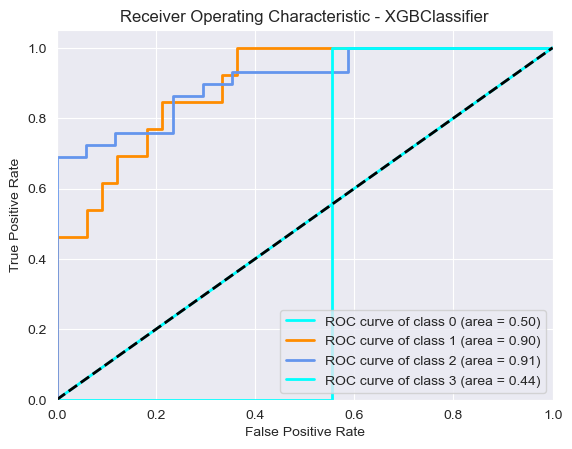

C:\Users\librarypc\miniconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


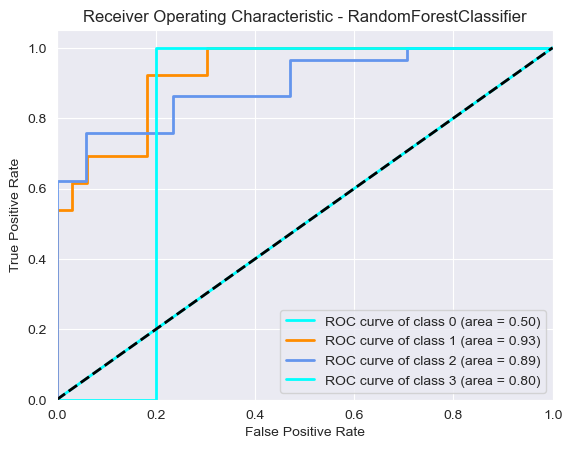

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import RidgeCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

# Assuming data_total and y_winner are defined
# Binarize the output
n_classes = len(np.unique(y_winner))
y_winner_binarized = label_binarize(y_winner, classes=np.arange(n_classes))

# Split data
x_train, x_test, y_train, y_test = train_test_split(data_total, y_winner_binarized, test_size=0.3, random_state=10)

# Helper function to plot ROC curve for each class
def plot_multiclass_roc(y_test, y_score, n_classes, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

# XGBClassifier
xgb_model = OneVsRestClassifier(XGBClassifier(max_depth=2, learning_rate=0.001, n_estimators=100, gamma=0, 
                                              min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005))
xgb_model.fit(x_train, y_train)
y_score_xgb = xgb_model.predict_proba(x_test)

# Plot ROC curve for XGBClassifier
plot_multiclass_roc(y_test, y_score_xgb, n_classes, 'XGBClassifier')

# RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=1000, max_depth=2, criterion='entropy', random_state=50))
rf_model.fit(x_train, y_train)
y_score_rf = rf_model.predict_proba(x_test)

# Plot ROC curve for RandomForestClassifier
plot_multiclass_roc(y_test, y_score_rf, n_classes, 'RandomForestClassifier')
